In [160]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [161]:
data = pd.read_csv("C:\\Users\\RAMAKRISHNAN\\Downloads\\fake_job_postings.csv.zip")

In [162]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [163]:
#preprocessing
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [164]:
#duplicates
data.duplicated().sum()

0

In [165]:
#remove missing values
data.dropna(inplace = True)

In [166]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 6 to 17865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               774 non-null    int64 
 1   title                774 non-null    object
 2   location             774 non-null    object
 3   department           774 non-null    object
 4   salary_range         774 non-null    object
 5   company_profile      774 non-null    object
 6   description          774 non-null    object
 7   requirements         774 non-null    object
 8   benefits             774 non-null    object
 9   telecommuting        774 non-null    int64 
 10  has_company_logo     774 non-null    int64 
 11  has_questions        774 non-null    int64 
 12  employment_type      774 non-null    object
 13  required_experience  774 non-null    object
 14  required_education   774 non-null    object
 15  industry             774 non-null    object
 16  functi

In [168]:
data.shape

(774, 18)

In [169]:
#diff catogorical and numerical data
data_num = data[["telecommuting","has_company_logo","has_questions","fraudulent"]]
data_cat = data[["title","location","department","salary_range","company_profile","description","requirements","benefits","employment_type","required_experience","required_education","industry","function"]]

<AxesSubplot:>

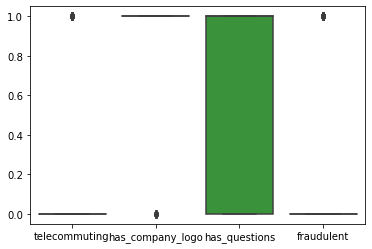

In [170]:
#checking outliers
sns.boxplot(data = data_num)


In [171]:
#removing outliers from columns
data_num = data_num[data_num["telecommuting"]<0.9]
data_num = data_num[data_num["has_company_logo"]>0.1]
data_num = data_num[data_num["fraudulent"]<0.9]
data_num

,telecommuting,has_company_logo,has_questions,fraudulent
6,0,1,1,0
15,0,1,1,0
23,0,1,0,0
134,0,1,0,0
153,0,1,1,0
...,...,...,...,...
17362,0,1,1,0
17371,0,1,1,0
17488,0,1,0,0
17849,0,1,0,0


<AxesSubplot:>

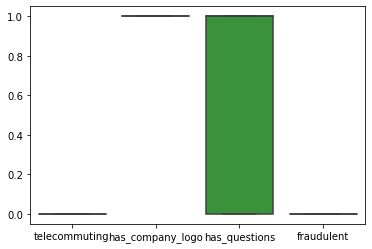

In [172]:
#removed the outlier
sns.boxplot(data = data_num)

In [173]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0


In [174]:
data["employment_type"].value_counts()

Full-time    712
Contract      35
Part-time     17
Temporary      6
Other          4
Name: employment_type, dtype: int64

<AxesSubplot:xlabel='employment_type', ylabel='Count'>

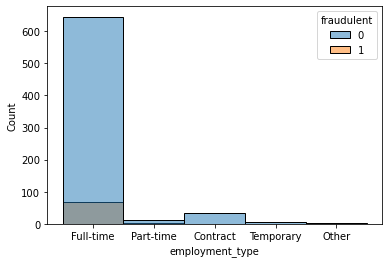

In [175]:
sns.histplot(x = data["employment_type"],hue = data["fraudulent"])
#here full time employment is more but it contains some fake jobs

<AxesSubplot:xlabel='required_experience', ylabel='Count'>

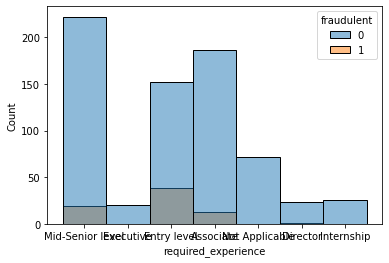

In [176]:

sns.histplot(x = data["required_experience"],hue =data["fraudulent"])

In [177]:
data["industry"].value_counts()

Information Technology and Services    131
Internet                               102
Computer Software                       76
Oil & Energy                            46
Marketing and Advertising               43
                                      ... 
Farming                                  1
Security and Investigations              1
Hospitality                              1
Writing and Editing                      1
Commercial Real Estate                   1
Name: industry, Length: 68, dtype: int64

In [178]:
data_industry = data[data["fraudulent"]==1]

In [179]:
data_industry["industry"].value_counts()
#here oil&energy have fake jobs

Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Retail                                   3
Management Consulting                    3
Telecommunications                       2
Insurance                                2
Human Resources                          2
Transportation/Trucking/Railroad         2
Logistics and Supply Chain               1
Warehousing                              1
Information Services                     1
Computer Networking                      1
Accounting                               1
Mechanical or Industrial Engineering     1
Security and Investigations              1
Construction                             1
Name: industry, dtype: int64

In [180]:
data_required_experience = data[data["fraudulent"]==1]

In [181]:
data_required_experience["required_experience"].value_counts()
#here entry level contains more fake jobs

Entry level         39
Mid-Senior level    19
Associate           13
Director             1
Name: required_experience, dtype: int64

In [182]:
#since we have more categorical data, we need to convert into numerical data using label encoder
from sklearn.preprocessing import LabelEncoder

In [183]:
le = LabelEncoder()

In [184]:
data.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0


In [185]:
data["title"] = le.fit_transform(data["title"])
data["location"] = le.fit_transform(data["location"])
data["company_profile"]=le.fit_transform(data["company_profile"])
data["description"]=le.fit_transform(data["description"])
data["employment_type"] = le.fit_transform(data["employment_type"])
data["required_experience"] = le.fit_transform(data["required_experience"])
data["required_education"]=le.fit_transform(data["required_education"])
data["industry"] = le.fit_transform(data["industry"])
data["function"] = le.fit_transform(data["function"])
data["department"]=le.fit_transform(data["department"])
data["salary_range"] = le.fit_transform(data["salary_range"])

In [186]:
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,255,10,12,83,67,677,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,1,5,4,50,20,0
15,16,596,91,193,23,89,24,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,1,3,1,24,31,0
23,24,599,110,37,9,165,2,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,1,3,7,38,31,0
98,99,269,100,155,294,196,250,"QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,1,5,3,49,23,1
102,103,346,43,147,43,125,532,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,1,2,1,38,22,0


In [187]:
#removing unwanted columns
data.drop(["requirements","benefits"],axis=1,inplace = True)

In [188]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,255,10,12,83,67,677,0,1,1,1,5,4,50,20,0
15,16,596,91,193,23,89,24,0,1,1,1,3,1,24,31,0
23,24,599,110,37,9,165,2,0,1,0,1,3,7,38,31,0
98,99,269,100,155,294,196,250,0,1,1,1,5,3,49,23,1
102,103,346,43,147,43,125,532,1,1,0,1,2,1,38,22,0


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 6 to 17865
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_id               774 non-null    int64
 1   title                774 non-null    int32
 2   location             774 non-null    int32
 3   department           774 non-null    int32
 4   salary_range         774 non-null    int32
 5   company_profile      774 non-null    int32
 6   description          774 non-null    int32
 7   telecommuting        774 non-null    int64
 8   has_company_logo     774 non-null    int64
 9   has_questions        774 non-null    int64
 10  employment_type      774 non-null    int32
 11  required_experience  774 non-null    int32
 12  required_education   774 non-null    int32
 13  industry             774 non-null    int32
 14  function             774 non-null    int32
 15  fraudulent           774 non-null    int64
dtypes: int32(11), int64(5)
m

In [190]:
#assigning input and target
x = data.iloc[:,0:15]
y = data.iloc[:,15]

In [193]:
data = data.reset_index()

In [194]:
data.head()

,index,job_id,title,location,department,salary_range,company_profile,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6,7,255,10,12,83,67,677,0,1,1,1,5,4,50,20,0
1,15,16,596,91,193,23,89,24,0,1,1,1,3,1,24,31,0
2,23,24,599,110,37,9,165,2,0,1,0,1,3,7,38,31,0
3,98,99,269,100,155,294,196,250,0,1,1,1,5,3,49,23,1
4,102,103,346,43,147,43,125,532,1,1,0,1,2,1,38,22,0


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=1212)

In [201]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [202]:
model = LogisticRegression()

In [203]:
model.fit(train_x,train_y)

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
log_pred = model.predict(test_x)

In [207]:
from sklearn.metrics import classification_report

In [209]:
print(classification_report(test_y,log_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       145
           1       0.33      0.20      0.25        10

    accuracy                           0.92       155
   macro avg       0.64      0.59      0.60       155
weighted avg       0.91      0.92      0.91       155



In [211]:
from sklearn.metrics import confusion_matrix

In [212]:
#in this case both false positive and false negatives are important
confusion_matrix(test_y,log_pred)

array([[141,   4],
       [  8,   2]], dtype=int64)

In [213]:
from sklearn.ensemble import AdaBoostClassifier

In [216]:
abc = AdaBoostClassifier(base_estimator= model,n_estimators= 25)

In [217]:
abc.fit(train_x,train_y)

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=25)

In [218]:
abc_pred = abc.predict(test_x)

In [219]:
print(classification_report(test_y,abc_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       145
           1       0.25      0.10      0.14        10

    accuracy                           0.92       155
   macro avg       0.60      0.54      0.55       155
weighted avg       0.90      0.92      0.91       155



In [220]:
confusion_matrix(test_y,abc_pred)

array([[142,   3],
       [  9,   1]], dtype=int64)

In [221]:
#Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [242]:
kn_model = KNeighborsClassifier(n_neighbors=10)

In [243]:
kn_model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

In [244]:
y_pred_kn = kn_model.predict(test_x)

In [245]:
print (classification_report(test_y,y_pred_kn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.67      0.20      0.31        10

    accuracy                           0.94       155
   macro avg       0.81      0.60      0.64       155
weighted avg       0.93      0.94      0.93       155



In [246]:
confusion_matrix(test_y,y_pred_kn)

array([[144,   1],
       [  8,   2]], dtype=int64)

In [247]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

In [248]:
gnb = GaussianNB()

In [249]:
gnb.fit(train_x,train_y)

GaussianNB()

In [251]:
gnb_pred = gnb.predict(test_x)

In [252]:
print(classification_report(test_y,gnb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       145
           1       0.67      0.60      0.63        10

    accuracy                           0.95       155
   macro avg       0.82      0.79      0.80       155
weighted avg       0.95      0.95      0.95       155



In [254]:
#SVM
from sklearn.svm import SVC

In [255]:
svm = SVC()

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
param_grid={"kernel":["sigmoid","linear","rbf"],"C":[0.1,1,10]}

In [261]:
gsv = GridSearchCV(estimator=svm,param_grid =param_grid,cv=5,n_jobs=-1,verbose=3)

In [262]:
gsv.fit(train_x,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.2min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['sigmoid', 'linear', 'rbf']},
             verbose=3)

In [263]:
gsv.best_estimator_

SVC(C=0.1, kernel='sigmoid')

In [264]:
gsv.best_score_

0.8998426435877261

In [265]:
final_model = SVC(C=0.1, kernel='sigmoid')

In [266]:
final_model.fit(train_x,train_y)

SVC(C=0.1, kernel='sigmoid')

In [267]:
svm_pred = final_model.predict(test_x)

In [268]:
print(classification_report(test_y,svm_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       145
           1       0.00      0.00      0.00        10

    accuracy                           0.94       155
   macro avg       0.47      0.50      0.48       155
weighted avg       0.88      0.94      0.90       155



C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [270]:
tree = DecisionTreeClassifier()

In [271]:
param_grid = {"criterion":["entropy"],"max_depth":[8,10,12,14],"min_samples_leaf":[20,30,40],"min_samples_split":[50,100,150]}

In [272]:
GSV = GridSearchCV(estimator = tree,param_grid = param_grid,cv=5,verbose=3,n_jobs = -1)

In [273]:
GSV.fit(train_x,train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8, 10, 12, 14],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [50, 100, 150]},
             verbose=3)

In [274]:
GSV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       min_samples_split=50)

In [275]:
GSV.best_score_

0.9208759506949908

In [276]:
param_grid = {"criterion":["entropy"],"max_depth":[4,6,8],"min_samples_leaf":[16,18,20],"min_samples_split":[30,40,50]}

In [277]:
GSV_1 = GridSearchCV(estimator = tree,param_grid = param_grid,cv=5,verbose=3,n_jobs = -1)

In [278]:
GSV_1.fit(train_x,train_y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [16, 18, 20],
                         'min_samples_split': [30, 40, 50]},
             verbose=3)

In [279]:
GSV_1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=18,
                       min_samples_split=40)

In [280]:
GSV_1.best_score_

0.9386441122475742

In [281]:
Final_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=18,
                       min_samples_split=40)

In [282]:
Final_model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=18,
                       min_samples_split=40)

In [283]:
tree_pred = Final_model.predict(test_x)

In [284]:
print(classification_report(test_y,tree_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       145
           1       0.64      0.70      0.67        10

    accuracy                           0.95       155
   macro avg       0.81      0.84      0.82       155
weighted avg       0.96      0.95      0.96       155



In [285]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [288]:
forest = RandomForestClassifier()

In [290]:
param_grid =  {"criterion":['gini',"entropy"],
             "max_depth":[8,12,14],
             "min_samples_split":[20,25,30],
             "min_samples_leaf":[10,20,30],
              "n_estimators":[25,50],
              "max_features":[4,9,13]}
              

In [292]:
gsv_1 = GridSearchCV(estimator = forest,param_grid= param_grid,cv=5,n_jobs=-1,verbose=3)

In [293]:
gsv_1.fit(train_x,train_y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   48.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 14], 'max_features': [4, 9, 13],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [25, 50]},
             verbose=3)

In [294]:
gsv_1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       min_samples_leaf=10, min_samples_split=25,
                       n_estimators=50)

In [300]:
gsv_1.best_score_

0.9564253868345135

In [297]:
param_grid =  {"criterion":['gini',"entropy"],
             "max_depth":[14,16,18,20],
             "min_samples_split":[20,25,30],
             "min_samples_leaf":[4,8,10],
              "n_estimators":[25,50],
              "max_features":[4,9,13]}
 

In [298]:
gsv_2 = GridSearchCV(estimator = forest,param_grid = param_grid,cv=5,n_jobs=-1,verbose=3)

In [299]:
gsv_2.fit(train_x,train_y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1516 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 16, 18, 20],
                         'max_features': [4, 9, 13],
                         'min_samples_leaf': [4, 8, 10],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [25, 50]},
             verbose=3)

In [301]:
gsv_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       min_samples_leaf=4, min_samples_split=20,
                       n_estimators=25)

In [302]:
gsv_2.best_score_

0.9628769997377393

In [303]:
final_model_1 = RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       min_samples_leaf=4, min_samples_split=20,
                       n_estimators=25)

In [304]:
final_model_1.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       min_samples_leaf=4, min_samples_split=20,
                       n_estimators=25)

In [305]:
forest_pred = final_model_1.predict(test_x)

In [306]:
print(classification_report(test_y,forest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.70      0.82        10

    accuracy                           0.98       155
   macro avg       0.99      0.85      0.91       155
weighted avg       0.98      0.98      0.98       155



In [307]:
#voting classifier
from sklearn.ensemble import VotingClassifier

In [309]:
vc = VotingClassifier(estimators =[("lr",model),("tr",tree),("fr",forest),("kn",kn_model)],n_jobs=-1,verbose = 3)

In [310]:
vc.fit(train_x,train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tr', DecisionTreeClassifier()),
                             ('fr', RandomForestClassifier()),
                             ('kn', KNeighborsClassifier(n_neighbors=10))],
                 n_jobs=-1, verbose=3)

In [311]:
vc_pred = vc.predict(test_x)

In [312]:
print(classification_report(test_y,vc_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       145
           1       1.00      0.20      0.33        10

    accuracy                           0.95       155
   macro avg       0.97      0.60      0.65       155
weighted avg       0.95      0.95      0.93       155

